### Referensi
https://www.datacamp.com/community/tutorials/decision-tree-classification-python

https://scikit-learn.org/stable/modules/tree.html

https://medium.com/deep-math-machine-learning-ai/chapter-4-decision-trees-algorithms-b93975f7a1f1

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

http://dataaspirant.com/2017/01/30/how-decision-tree-algorithm-works/

https://medium.com/coinmonks/what-is-entropy-and-why-information-gain-is-matter-4e85d46d2f01

### Konsep Dasar
Konsep dasar algoritma ini adalah mengubah dataset menjadi aturan aturan keputusan yang akan menyerupai suatu pohon. Suatu Decision Tree terdiri dari node yang melambangkan feature/atribut, branch yang melambangkan decision rule, dan leaf yang melambangkan outcome.

### Algoritma

1. ID3 (Iterative Dichotomiser 3)
2. C4.5
3. CART (Classification And Regression Tree)

### Entropy
adalah suatu parameter yang mengukur tingkat keberagaman (heterogentias) dari suatu kumpulan data. 

Semakin heterogen, nilai entropy akan semakin besar. Jika Entropy = 0, aritnya dia tidak beragam dan Subset tersebut terklasifikasi secara sempurna. Atau dapat dikatakan bahwa subset tersebut hanya dimiliki oleh sampel positive saja atau sampel negatif saja. Atau dapat dikatakan juga bahwa subset yang memiliki nilai Entropy = 0, dia tidak perlu di split.

Keadaan Entropy = 0 ini disebut dengan keadan pure set. Formula dari Entropy adalah

Entropy = $-\Sigma p(x)logp(x)$

dimana p(x) adalah proporsi untuk setiap kelas

## Information Gain
Information Gain memberitahu kita seberapa banyak informasi yang diberikan feature tentang kelasnya. Juga Mengukur efektifitas suatu atribut dalam mengklasifikasikan data. Information Gain inilah yang akan menjadi kunci terbentuknya Decision Tree. Variabel yang mempunyai Information Gain yang tertinggi akan menjadi variabel yang berada di paling atas (di split terlebih dahulu). 

Formula dari Information Gain adalah

IG = Entropy(Parent) - [weighted_average]*entropy(children)

### Kelebihan Decision Tree

1. Simple to understand and to interpret. Trees can be visualised.

2. Requires little data preparation. Other techniques often require data normalisation, dummy variables need to be created and blank values to be removed. Note however that this module does not support missing values.

3. The cost of using the tree (i.e., predicting data) is logarithmic in the number of data points used to train the tree.

4. Able to handle both numerical and categorical data. Other techniques are usually specialised in analysing datasets that have only one type of variable. See algorithms for more information.

5. Able to handle multi-output problems.

6. Uses a white box model. If a given situation is observable in a model, the explanation for the condition is easily explained by boolean logic. By contrast, in a black box model (e.g., in an artificial neural network), results may be more difficult to interpret.

7. Possible to validate a model using statistical tests. That makes it possible to account for the reliability of the model.

8. Performs well even if its assumptions are somewhat violated by the true model from which the data were generated.

### Kekurangan Decision Tree

1. Decision-tree learners can create over-complex trees that do not generalise the data well. This is called overfitting. Mechanisms such as pruning (not currently supported), setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.

2. Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble.

3. The problem of learning an optimal decision tree is known to be NP-complete under several aspects of optimality and even for simple concepts. Consequently, practical decision-tree learning algorithms are based on heuristic algorithms such as the greedy algorithm where locally optimal decisions are made at each node. Such algorithms cannot guarantee to return the globally optimal decision tree. This can be mitigated by training multiple trees in an ensemble learner, where the features and samples are randomly sampled with replacement.

4. There are concepts that are hard to learn because decision trees do not express them easily, such as XOR, parity or multiplexer problems.

5. Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree.

### Load Package

In [35]:
import pandas as pd # package untuk dataframe

In [36]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

In [37]:
from sklearn.model_selection import train_test_split # package untuk split data train dan data test

In [38]:
from sklearn import metrics # pakage untuk menghitung akurasi prediksi

### Dataset
dataset yang digunakan kali ini menggunakan dataset dari kaggle.com

https://www.kaggle.com/uciml/pima-indians-diabetes-database

Pregnancies : Number of times pregnant

Glucose : Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure : Diastolic blood pressure (mm Hg)

SkinThickness :Triceps skin fold thickness (mm)

Insulin : 2-Hour serum insulin (mu U/ml)

BMI : Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction : Diabetes pedigree function

Age : Age (years)

Outcome : Class variable (0 or 1) 268 of 768 are 1, the others are 0

In [39]:
diabetes = pd.read_csv('diabetes.csv')

In [40]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Preprocessing Data
Meliputi inspeksi null data, kategorisasi, encoding

In [41]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [42]:
diabetes.isnull().count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

In [43]:
## Pemilihan Feature
feature_cols = ['Pregnancies','Insulin','BMI','Age','Glucose','BloodPressure','DiabetesPedigreeFunction']

In [44]:
# Feature
X = diabetes[feature_cols]

In [45]:
# Target Variable
y = diabetes.Outcome

In [46]:
# Split data into data train and data test
train_test_split?

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [48]:
# Create Decision Tree Object
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [49]:
y_pred = clf.predict(X_test)

In [50]:
# Memperoleh akurasi algoritma
print("Accuracy :",metrics.accuracy_score(y_test,y_pred))

Accuracy : 0.6883116883116883


### Membuat diagram decision tree

In [51]:
from sklearn.tree import export_graphviz

In [52]:
from sklearn.externals.six import StringIO

In [53]:
from IPython.display import Image

In [54]:
import pydotplus

In [55]:
import graphviz 
# Package ini perlu instalasi : python-graphviz

In [56]:
dot_data = StringIO()

In [57]:
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])

In [58]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

In [59]:
graph.write_png('diabetes.png') # Menyimpan gambar hasil decision tree di lokal directory
# perlu install graphviz di https://graphviz.gitlab.io/_pages/Download/Download_windows.html

True

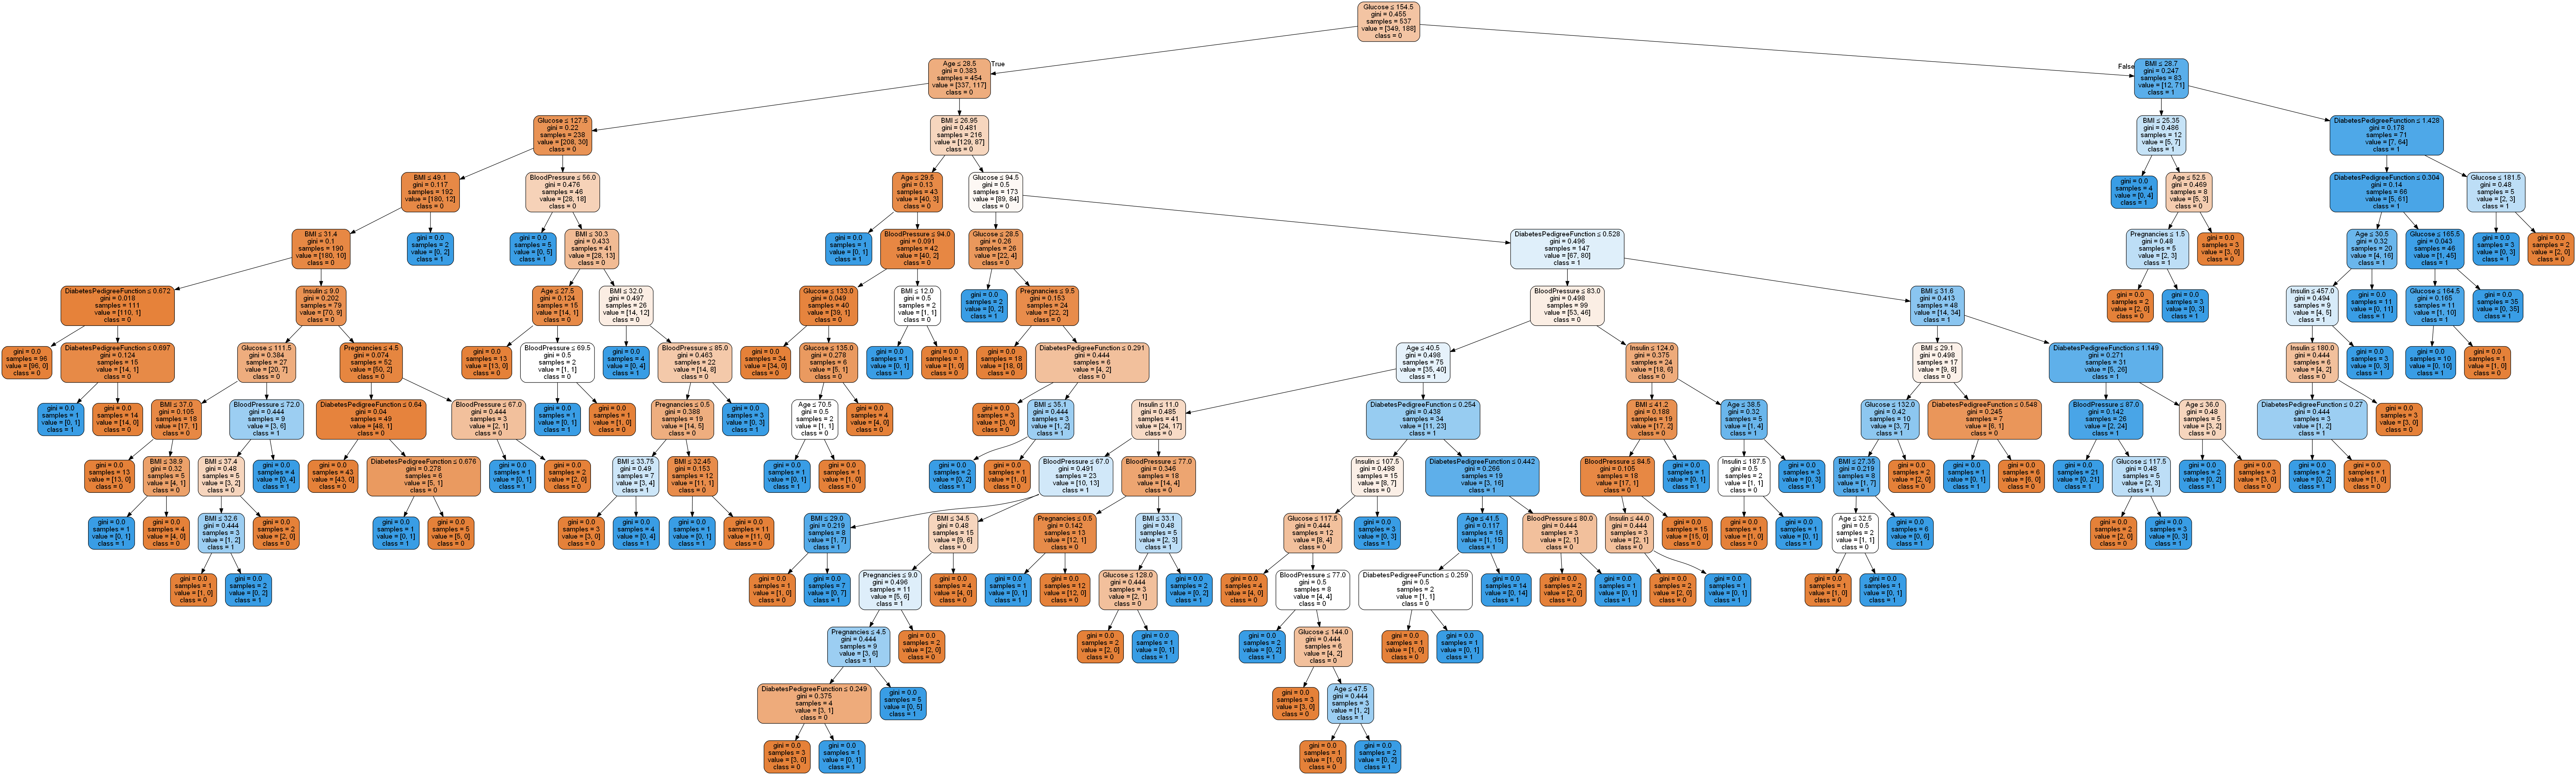

In [60]:
Image(graph.create_png()) # Menampilkan gambar hasil decision tree di notebook

In [61]:
# Create Decision Tree Classification Object
# Dipilih entrpopy sebagai alat seleksi atribut (Feature Selection)
# Dipilih 3 sebagai The maximum depth of the tree 
clf_1 = DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [62]:
# Proses Fitting Model
clf_1 = clf_1.fit(X_train,y_train)

In [63]:
# Membuat Prediksi
y_pred_1 = clf_1.predict(X_test)

In [64]:
# Akurasi Model 
print('Accuracy :',metrics.accuracy_score(y_test,y_pred_1))

Accuracy : 0.7186147186147186


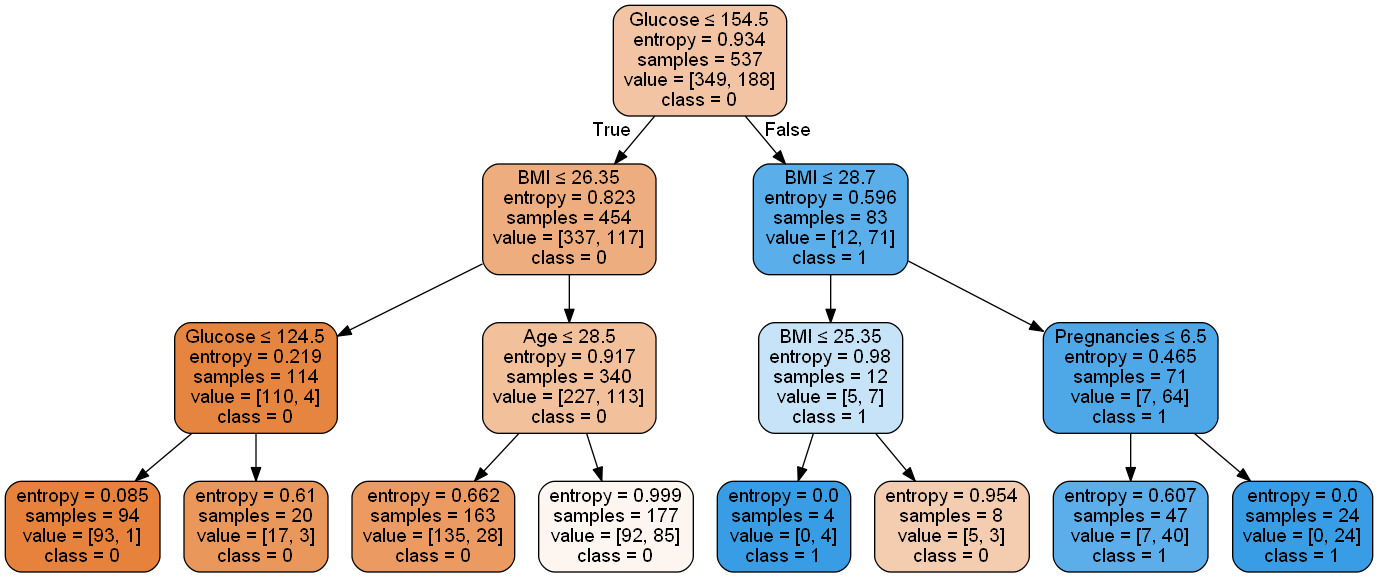

In [65]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf_1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes_1.png')
Image(graph.create_png())